In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C://Users//ACER//Downloads/force2020_data.csv")

In [3]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [4]:
data.shape

(18270, 6)

In [5]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18265    False
18266    False
18267    False
18268    False
18269    False
Length: 18270, dtype: bool

In [6]:
data.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [7]:
data.columns.duplicated()

array([False, False, False, False, False, False])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [9]:
data['NPHI'] = data['NPHI'].fillna(data['NPHI'].mean())
data['PEF'] = data['PEF'].fillna(data['PEF'].mean())
data['DTC'] = data['DTC'].fillna(data['DTC'].mean())

In [10]:
data.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

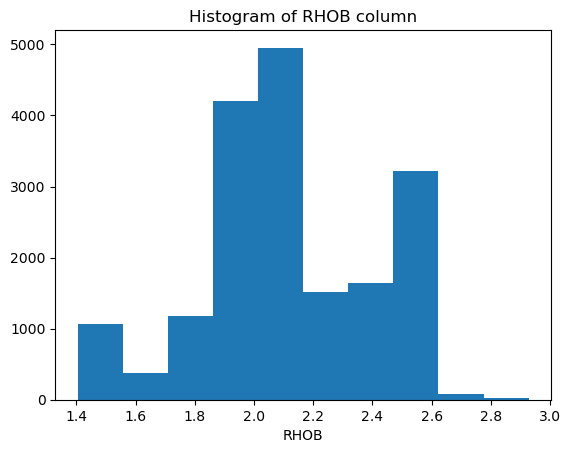

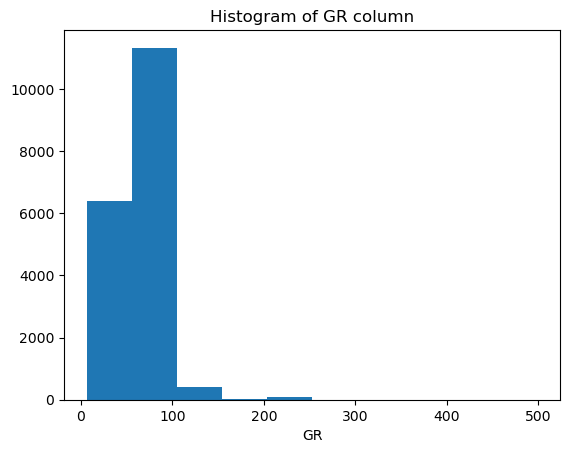

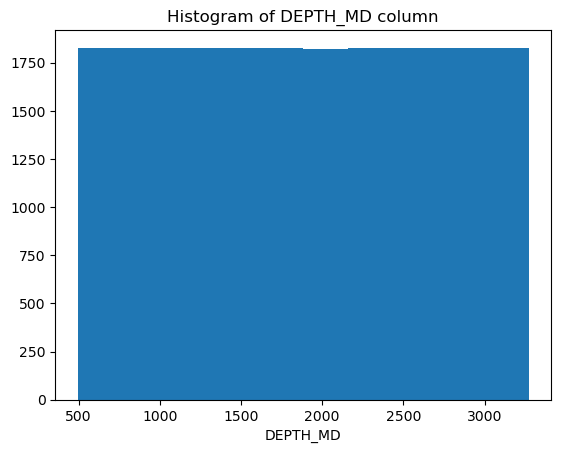

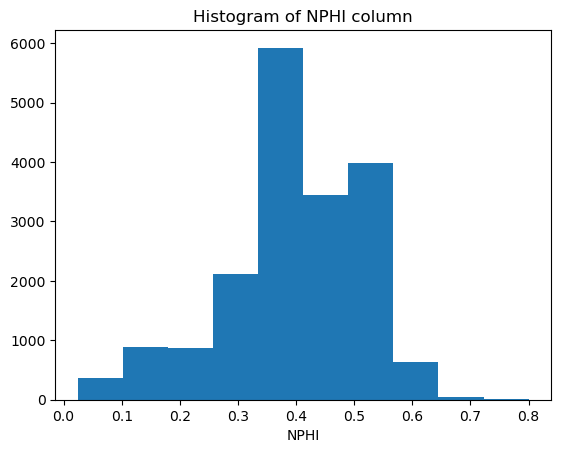

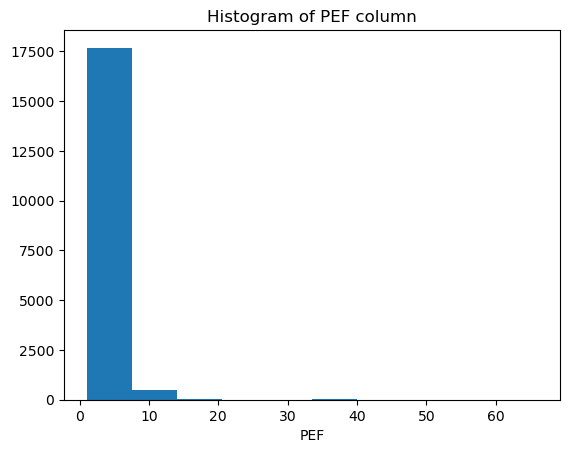

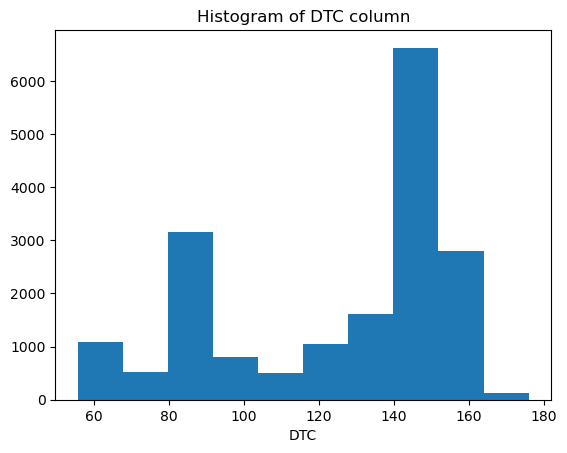

In [11]:
for col in data: 
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.show()

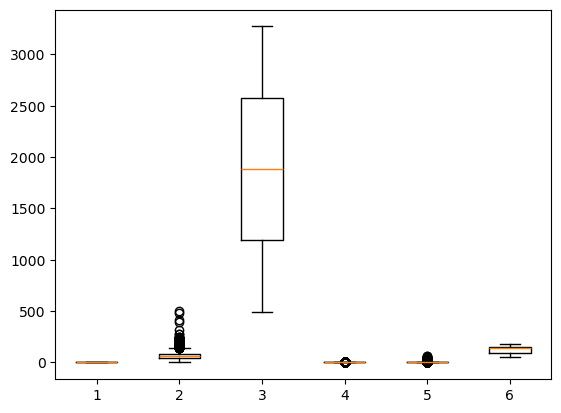

In [12]:
plt.boxplot(data) 
plt.show()

In [13]:
def remove_outliers(data,column_name):
    q1 = data[column_name].quantile(0.25) 
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1 
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    data[column_name] = data[column_name].clip(upper=ub)
    data[column_name] = data[column_name].clip(lower=lb)
    return data[column_name]

In [14]:
for col in data: 
    data[col] = remove_outliers(data, col)

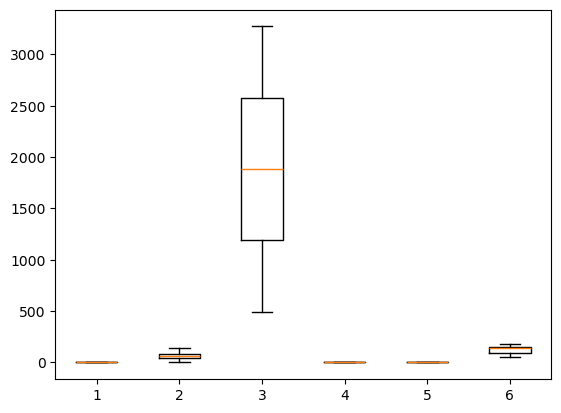

In [15]:
plt.boxplot(data) 
plt.show()

In [16]:
std_scalar = StandardScaler()
data['Std_RHOB'] = std_scalar.fit_transform(data[['RHOB']])

In [17]:
std_scalar = StandardScaler()
data['Std_GR'] = std_scalar.fit_transform(data[['GR']])

In [18]:
std_scalar = StandardScaler()
data['Std_DEPTH_MD'] = std_scalar.fit_transform(data[['DEPTH_MD']])

In [19]:
std_scalar = StandardScaler()
data['Std_NPHI'] = std_scalar.fit_transform(data[['NPHI']])

In [20]:
std_scalar = StandardScaler()
data['Std_PEF'] = std_scalar.fit_transform(data[['PEF']])

In [21]:
std_scalar = StandardScaler()
data['Std_DTC'] = std_scalar.fit_transform(data[['DTC']])

In [22]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC
0,1.884186,80.200851,494.528,0.404547,6.583927,161.131180,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00
1,1.889794,79.262886,494.680,0.404547,6.583927,160.603470,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00
2,1.896523,74.821999,494.832,0.404547,6.583927,160.173615,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00
3,1.891913,72.878922,494.984,0.404547,6.583927,160.149429,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00
4,1.880034,71.729141,495.136,0.404547,6.583927,160.128342,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16


In [23]:
from sklearn.cluster import KMeans

In [24]:
X = data
X.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC
0,1.884186,80.200851,494.528,0.404547,6.583927,161.131180,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232
1,1.889794,79.262886,494.680,0.404547,6.583927,160.603470,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958
2,1.896523,74.821999,494.832,0.404547,6.583927,160.173615,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887
3,1.891913,72.878922,494.984,0.404547,6.583927,160.149429,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096
4,1.880034,71.729141,495.136,0.404547,6.583927,160.128342,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405


In [25]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

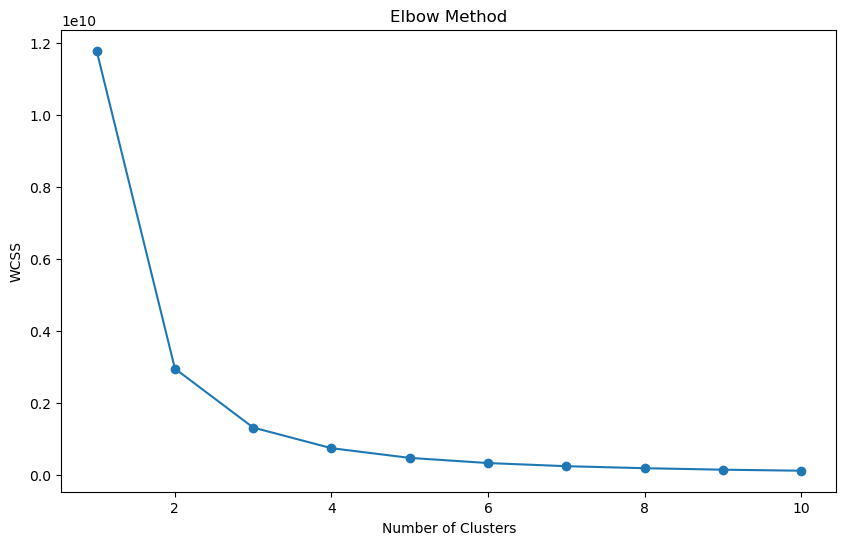

In [26]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [28]:
data['Cluster'] = y_kmeans
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC,Cluster
0,1.884186,80.200851,494.528,0.404547,6.583927,161.131180,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,1
1,1.889794,79.262886,494.680,0.404547,6.583927,160.603470,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,1
2,1.896523,74.821999,494.832,0.404547,6.583927,160.173615,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,1
3,1.891913,72.878922,494.984,0.404547,6.583927,160.149429,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,1
4,1.880034,71.729141,495.136,0.404547,6.583927,160.128342,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,0
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,0
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,0
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,0


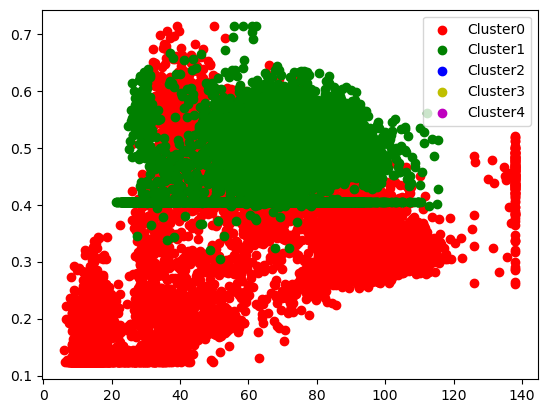

In [29]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['GR'],
              cluster_data['NPHI'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [30]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(X, y_kmeans)            #Silhouette score of kmeans clustering
print(silhouette_avg1)

0.6248709225884455


In [31]:
data['Cluster'].value_counts()

Cluster
1    9140
0    9130
Name: count, dtype: int64

In [32]:
X = data[['RHOB','DTC']]
X.head()

,RHOB,DTC
0,1.884186,161.131180
1,1.889794,160.603470
2,1.896523,160.173615
3,1.891913,160.149429
4,1.880034,160.128342


In [74]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [76]:
data['Cluster'] = y_kmeans
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC,Cluster
0,1.884186,80.200851,494.528,0.404547,6.583927,161.131180,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,0
1,1.889794,79.262886,494.680,0.404547,6.583927,160.603470,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,0
2,1.896523,74.821999,494.832,0.404547,6.583927,160.173615,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,0
3,1.891913,72.878922,494.984,0.404547,6.583927,160.149429,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,0
4,1.880034,71.729141,495.136,0.404547,6.583927,160.128342,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,0
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,0
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,0
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,0


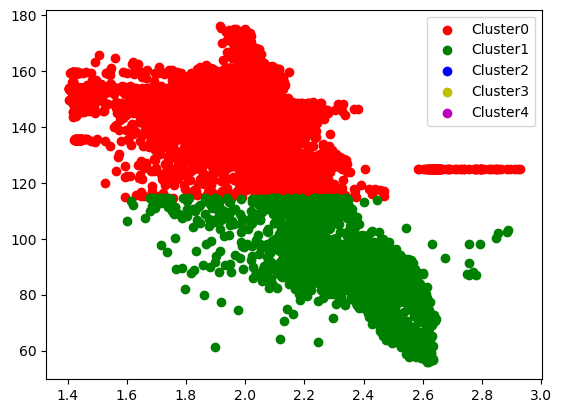

In [78]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg2 = silhouette_score(X, y_kmeans)            #Silhouette score of kmeans clustering
print(silhouette_avg2)